# Exporting data

There are fundamentally two different data types:

- spatially averaged data (as in the `odt` [OOMMF Data Table] file)
- spatially resolved data (as in the `omf`, `omv` files)

## Access the raw OOMMF output files

When Jupyter OOMMF needs a micromagnetic calculation to be carried out, it is writing a `mif` file, and then asks OOMMF to execute that miffile, and export data to the file system.

It it thus possible to read the output files from the disk as one would normally with OOMMF. This allows re-use of all existing tools to analyse OOMMF data (including muview, ovf2vtk, ...)

Example

In [1]:
import hublib.use
%use oommf-1.2b0

import oommfc as oc
system = oc.examples.macrospin()
td = oc.TimeDriver()
td.drive(system, t=0.1e-9, n=5)

2017/11/20 18:28: Calling OOMMF (example-macrospin/example-macrospin.mif) ... [1.5s]


From the last output line, we can see that the OOMMF data is stored in the directory `example-macrospin`. We can display the content:

In [2]:
!ls example-macrospin/

example-macrospin.mif
example-macrospin.odt
example-macrospin-Oxs_TimeDriver-Magnetization-00-0000036.omf
example-macrospin-Oxs_TimeDriver-Magnetization-01-0000066.omf
example-macrospin-Oxs_TimeDriver-Magnetization-02-0000092.omf
example-macrospin-Oxs_TimeDriver-Magnetization-03-0000113.omf
example-macrospin-Oxs_TimeDriver-Magnetization-04-0000130.omf
m0.omf


## Exporting the OOMMF Data Table
The file `example-macrospin.odt` is automatically read and available as a pandas data table in the `system.dt` object. We can thus use all the export functionality that pandas supports. For example

In [3]:
# display beginning of data table in notebook
system.dt.head()

,E,Ecount,max_dm/dt,dE/dt,deltaE,E_Zeeman,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t
0,-5.033171e-18,217.0,37867.797392,-1.241326e-07,-4.522273e-20,-5.033171e-18,36.0,36.0,0.0,-0.597360,-0.038383,0.801054,3.586075e-13,2.000000e-11
1,-6.131373e-18,392.0,13822.238704,-1.653875e-08,-6.256125e-21,-6.131373e-18,66.0,29.0,1.0,0.216713,0.027838,0.975838,3.708125e-13,4.000000e-11
2,-6.266081e-18,543.0,4664.609034,-1.883547e-09,-1.210170e-21,-6.266081e-18,92.0,25.0,2.0,-0.072403,-0.013953,0.997278,6.216520e-13,6.000000e-11
3,-6.281233e-18,664.0,1577.051840,-2.152969e-10,-2.059347e-22,-6.281233e-18,113.0,20.0,3.0,0.024163,0.006131,0.999689,9.181643e-13,8.000000e-11
4,-6.282947e-18,761.0,550.439309,-2.622797e-11,-3.440007e-23,-6.282947e-18,130.0,16.0,4.0,-0.008347,-0.002458,0.999962,1.290222e-12,1.000000e-10


### MS Excel, html, latex, json

In [4]:
system.dt.to_excel("data-odt.xlsx")

In [5]:
system.dt.to_html("data-odt.html")

In [6]:
system.dt.to_latex("data-odt.tex")

In [7]:
system.dt.to_json("data-odt.json")

In [8]:
!ls -l data-odt.*

-rw-r----- 1 mmh public 2402 Nov 20 18:28 data-odt.html
-rw-r----- 1 mmh public 1202 Nov 20 18:28 data-odt.json
-rw-r----- 1 mmh public 1319 Nov 20 18:28 data-odt.tex
-rw-r----- 1 mmh public 6336 Nov 20 18:28 data-odt.xlsx


In [9]:
!head -n 2 data-odt.xlsx

�Y��:���x��"fϻ�֫�V���r�43���#_,��8��?�qS5�q�U~��ܖ�x���{�~E\\$_���M���n���<�=���?�*Ϋ���O�ƞ��G}�T������.�ߋ�s\d?W���,._^+����&Y��GE�>(v��۬�
�Y3����zxw�������ל��o�


In [10]:
!head data-odt.html

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>E</th>
      <th>Ecount</th>
      <th>max_dm/dt</th>
      <th>dE/dt</th>
      <th>deltaE</th>
      <th>E_Zeeman</th>


In [11]:
!head data-odt.json

{"E":{"0":-5.033171479e-18,"1":-6.131373041e-18,"2":-6.266081472e-18,"3":-6.281232628e-18,"4":-6.28294746e-18},"Ecount":{"0":217.0,"1":392.0,"2":543.0,"3":664.0,"4":761.0},"max_dm\/dt":{"0":37867.7973924228,"1":13822.2387039212,"2":4664.6090341554,"3":1577.0518398457,"4":550.4393093324},"dE\/dt":{"0":-0.0000001241,"1":-0.0000000165,"2":-0.0000000019,"3":-0.0000000002,"4":-0.0},"deltaE":{"0":-4.522272608e-20,"1":-6.25612476e-21,"2":-1.210169685e-21,"3":-2.059346614e-22,"4":-3.440006546e-23},"E_Zeeman":{"0":-5.033171479e-18,"1":-6.131373041e-18,"2":-6.266081472e-18,"3":-6.281232628e-18,"4":-6.28294746e-18},"iteration":{"0":36.0,"1":66.0,"2":92.0,"3":113.0,"4":130.0},"stage_iteration":{"0":36.0,"1":29.0,"2":25.0,"3":20.0,"4":16.0},"stage":{"0":0.0,"1":1.0,"2":2.0,"3":3.0,"4":4.0},"mx":{"0":-0.5973600676,"1":0.2167132278,"2":-0.0724031353,"3":0.0241634253,"4":-0.0083465781},"my":{"0":-0.0383828866,"1":0.0278376651,"2":-0.0139533404,"3":0.0061310212,"4":-0.0024581319},"mz":{"0":0.8010541203

In [12]:
!head data-odt.tex

\begin{tabular}{lrrrrrrrrrrrrrr}
\toprule
{} &             E &  Ecount &     max\_dm/dt &         dE/dt &        deltaE &      E\_Zeeman &  iteration &  stage\_iteration &  stage &        mx &        my &        mz &  last\_time\_step &             t \\
\midrule
0 & -5.033171e-18 &   217.0 &  37867.797392 & -1.241326e-07 & -4.522273e-20 & -5.033171e-18 &       36.0 &             36.0 &    0.0 & -0.597360 & -0.038383 &  0.801054 &    3.586075e-13 &  2.000000e-11 \\
1 & -6.131373e-18 &   392.0 &  13822.238704 & -1.653875e-08 & -6.256125e-21 & -6.131373e-18 &       66.0 &             29.0 &    1.0 &  0.216713 &  0.027838 &  0.975838 &    3.708125e-13 &  4.000000e-11 \\
2 & -6.266081e-18 &   543.0 &   4664.609034 & -1.883547e-09 & -1.210170e-21 & -6.266081e-18 &       92.0 &             25.0 &    2.0 & -0.072403 & -0.013953 &  0.997278 &    6.216520e-13 &  6.000000e-11 \\
3 & -6.281233e-18 &   664.0 &   1577.051840 & -2.152969e-10 & -2.059347e-22 & -6.281233e-18 &      113.0 &             

### Numpy arrays

Given a pandas table, we can extract each column as a (Pandas) Series:

In [13]:
t_series = system.dt['t']
t_series

0    2.000000e-11
1    4.000000e-11
2    6.000000e-11
3    8.000000e-11
4    1.000000e-10
Name: t, dtype: float64

Or convert this into a numpy array:

In [14]:
import numpy as np
t_array = np.array(system.dt['t'])
mx_array = np.array(system.dt['mx'])

for example to plot the data in some custom way:

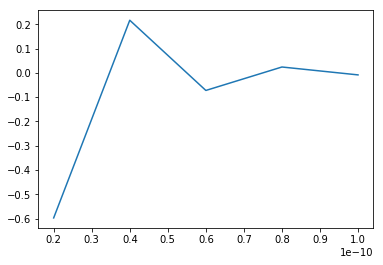

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots()
axes.plot(t_array, mx_array)

To see which data columns are available in the table, we can use:

In [16]:
system.dt.columns

Index(['E', 'Ecount', 'max_dm/dt', 'dE/dt', 'deltaE', 'E_Zeeman', 'iteration',
       'stage_iteration', 'stage', 'mx', 'my', 'mz', 'last_time_step', 't'],
      dtype='object')

or

In [17]:
list(system.dt.columns)

['E',
 'Ecount',
 'max_dm/dt',
 'dE/dt',
 'deltaE',
 'E_Zeeman',
 'iteration',
 'stage_iteration',
 'stage',
 'mx',
 'my',
 'mz',
 'last_time_step',
 't']

## TODO: Add section on OMF files

<hr>
Cleaning up.  Temporary files were written.  You may want to remove them.

In [18]:
!rm -rf example-macrospin